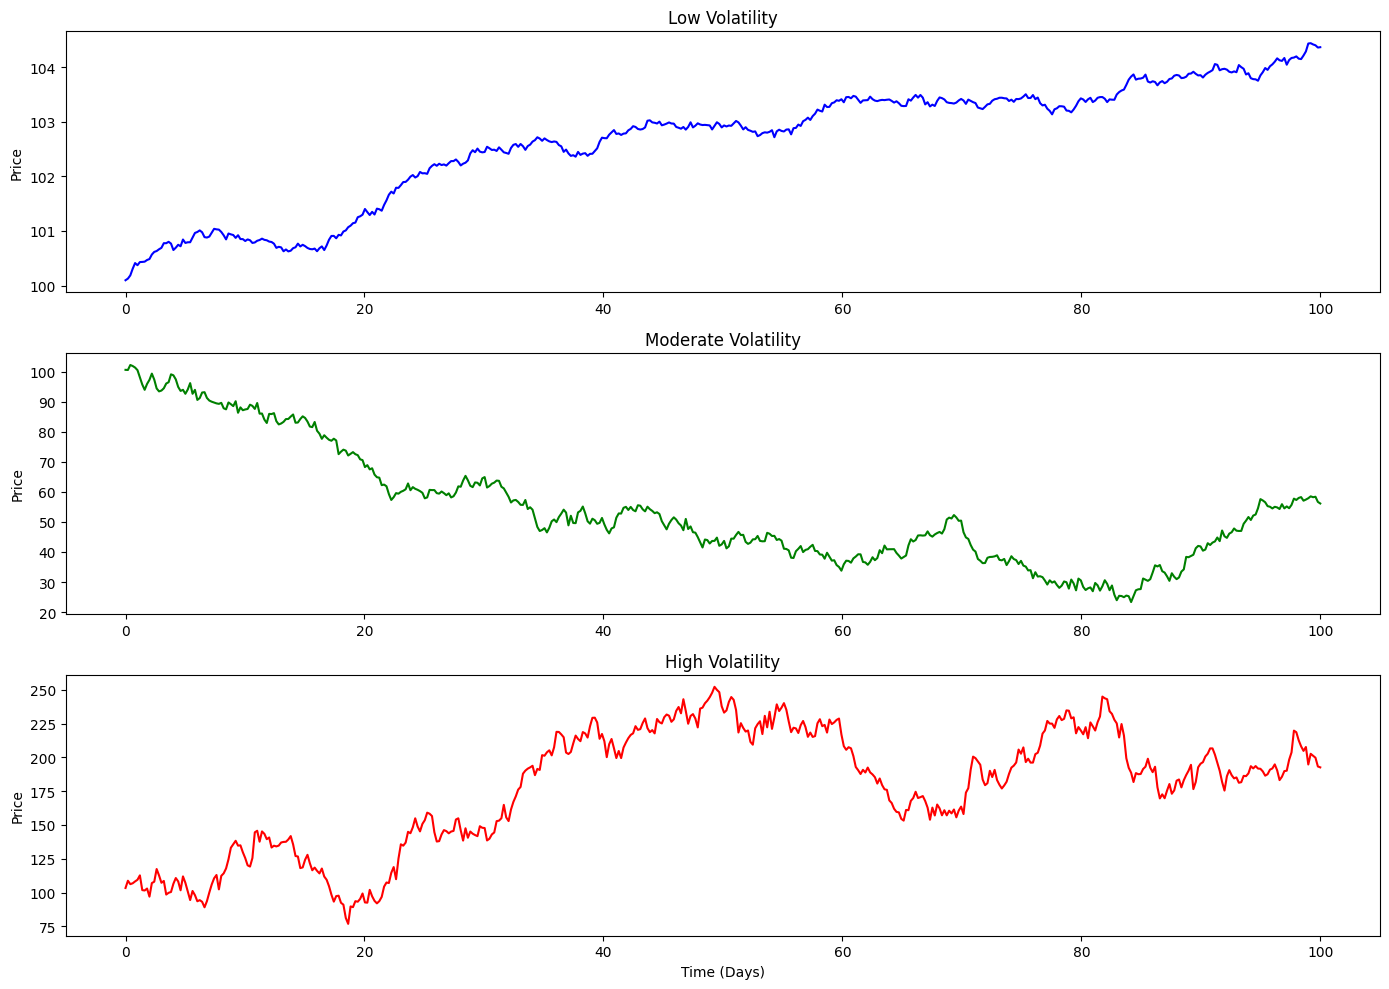

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Setting a seed for reproducibility
np.random.seed(0)

# Generate data for each scenario
# Time array (e.g., days)
t = np.linspace(0, 100, 500)

low_volatility_adjusted = 100 + np.cumsum(np.random.normal(0.01, 0.05, t.size))

# Moderate Volatility: increased fluctuations
moderate_volatility_adjusted = 100 + np.cumsum(np.random.normal(0.01, 1.5, t.size))

# High Volatility: greatly increased fluctuations
high_volatility_adjusted = 100 + np.cumsum(np.random.normal(0.01, 6, t.size))

# Re-plotting the scenarios with adjusted volatility levels
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t, low_volatility_adjusted, color='blue')
plt.title('Low Volatility')
plt.ylabel('Price')

plt.subplot(3, 1, 2)
plt.plot(t, moderate_volatility_adjusted, color='green')
plt.title('Moderate Volatility')
plt.ylabel('Price')

plt.subplot(3, 1, 3)
plt.plot(t, high_volatility_adjusted, color='red')
plt.title('High Volatility')
plt.ylabel('Price')
plt.xlabel('Time (Days)')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


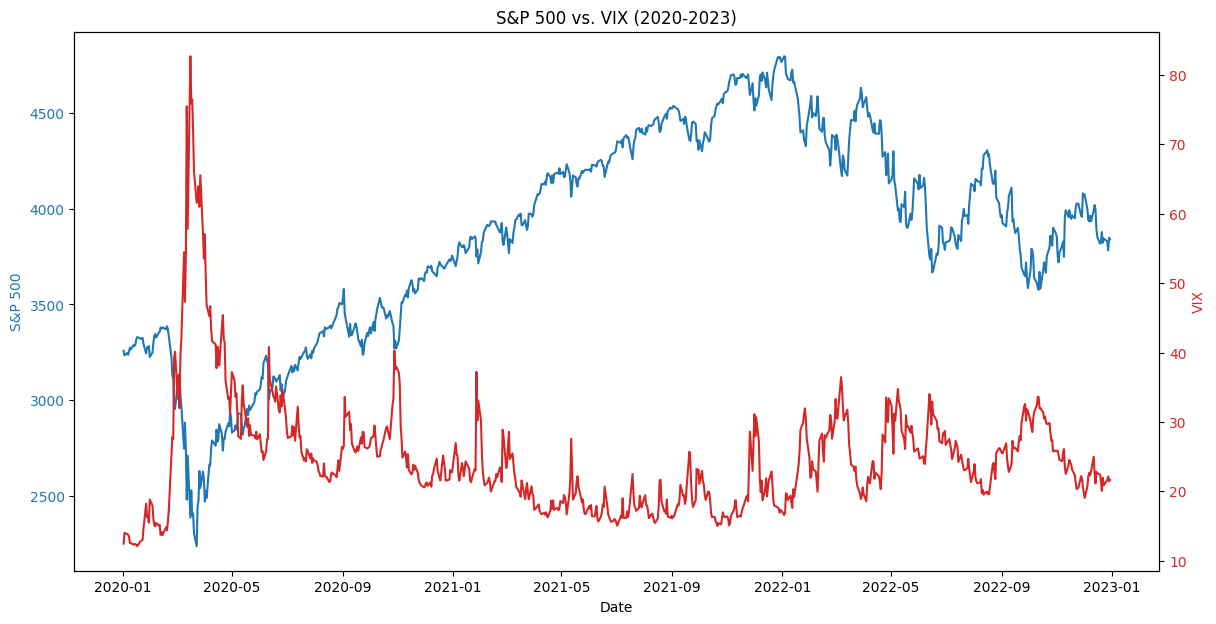

In [ ]:
!pip install yfinance matplotlib


import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for S&P 500 (using the symbol '^GSPC') and VIX (using the symbol '^VIX')
sp500 = yf.download('^GSPC', start='2020-01-01', end='2023-01-01')
vix = yf.download('^VIX', start='2020-01-01', end='2023-01-01')

# Create a new figure and axis object
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the S&P 500 on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500', color=color)
ax1.plot(sp500.index, sp500['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the VIX
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('VIX', color=color)
ax2.plot(vix.index, vix['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the graph
plt.title('S&P 500 vs. VIX (2020-2023)')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


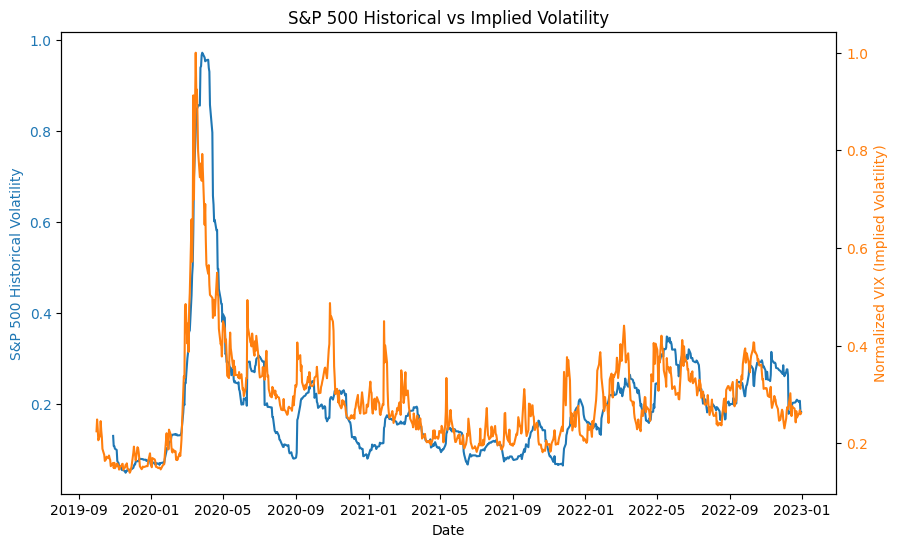

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for the S&P 500
sp500 = yf.download('^GSPC', start='2019-10-01', end='2023-01-01')

# Calculate historical volatility (using the standard deviation of daily returns)
sp500['Daily Return'] = sp500['Adj Close'].pct_change()
sp500['HV'] = sp500['Daily Return'].rolling(window=20).std() * (252 ** 0.5)  # Annualized

# Fetch historical VIX data
vix = yf.download('^VIX', start='2019-10-01', end='2023-01-01')

# Normalize the VIX values to compare with historical volatility
vix['Normalized VIX'] = vix['Adj Close'] / max(vix['Adj Close'])

# Plot both series
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Historical Volatility', color=color)
ax1.plot(sp500.index, sp500['HV'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Normalized VIX (Implied Volatility)', color=color)
ax2.plot(vix.index, vix['Normalized VIX'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('S&P 500 Historical vs Implied Volatility')
plt.show()


[*********************100%%**********************]  1 of 1 completed


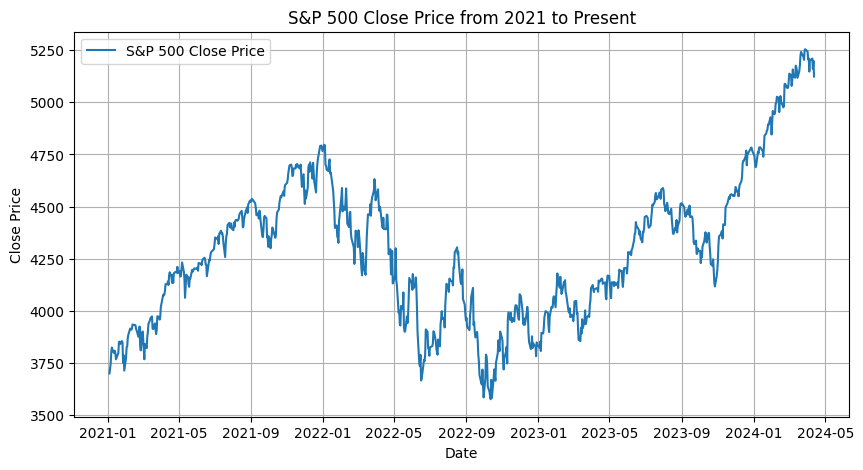

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for the S&P 500 index
ticker_symbol = "^GSPC"

# Set the date range (from 2021 to the present day)
start_date = "2021-01-01"
end_date = "2024-04-15"  # Update this to the current date if necessary

# Download the historical data for the S&P 500
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plotting the closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='S&P 500 Close Price')
plt.title('S&P 500 Close Price from 2021 to Present')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
